# Imbalanced Data in Machine Learning

Imbalanced data refers to a dataset where the classes are not represented equally, meaning one class significantly outnumbers the other(s). This can lead to **biased models** that perform well on the majority class but poorly on the minority class.

---

## Problems with Imbalanced Data

### 1. **Bias**
Jab hum apne machine learning model ko aise data pe train karte hain jisme ek class majority mein hoti hai aur ek minority mein, to model ka zyada focus majority class par hota hai.  
Isse model minority class ko ignore kar deta hai, jiske wajah se **bias** aa jata hai.

---

### 2. **Metrics are not reliable**

#### Example:
- 900 YES
- 100 NO


This is our training data — 900 students have been placed, and 100 students have not.

Now, if we train a **very naive model** that always predicts "Placement will happen" (i.e., always predicts YES),  
its accuracy will be:

> Accuracy = (900 correct predictions / 1000 total predictions) = **90%**

Even though the model has 90% accuracy, this metric is **misleading** because it completely **fails to identify** the students who were not placed.

---

## Domains Where Imbalanced Data is Common

Imbalanced data occurs across many industries and domains:

### 1. **Finance**
- Fraud Detection  
- Credit Risk Assessment

### 2. **Healthcare**
- Prediction of Rare Diseases

### 3. **Manufacturing**
- Predicting Equipment Failures in Advance

### 4. **Consumer Internet**
- Churn Prediction (e.g., Netflix, Amazon Prime)

### 5. **Environmental Science**
- Earthquake Prediction  
- Volcano Eruption Prediction

---


# Handling Imbalanced Data

## 1. Under Sampling

**Under Sampling** is a technique used to reduce the number of samples in the majority class so that it becomes equal to the number of samples in the minority class.

In this approach, we pick data points from the majority class and apply sampling, selecting only as many samples as there are in the minority class. This results in a new **balanced dataset** which can be used for model training.

---

### Visual Illustration:

| **Original Dataset**     |             | **After Under Sampling**  |             |
|--------------------------|-------------|----------------------------|-------------|
| Class 1: 100 samples     |             | Class 1: 50 samples        |             |
| Class 2: 50 samples      |             | Class 2: 50 samples        |             |

We apply **random sampling** on the majority class (e.g., Class 1) until the number of samples is **equal** to that of the minority class.

---

## Advantages of Under Sampling

1. **Reduction in Bias**  
   Both classes now contribute equally to training, reducing the chance of model bias.

2. **Faster Training**  
   If the dataset is very large (e.g., 100,000:10,000), under sampling reduces the size,  
   which leads to **faster training time**.

---

## Disadvantages of Under Sampling

1. **Information Loss**  
   Important data points may be dropped, which can lead to **underfitting**.

2. **Sampling Bias**  
   Due to random selection, the model might miss out on important patterns.  
   It’s possible that a particular type of data point gets repeatedly selected, reducing diversity.



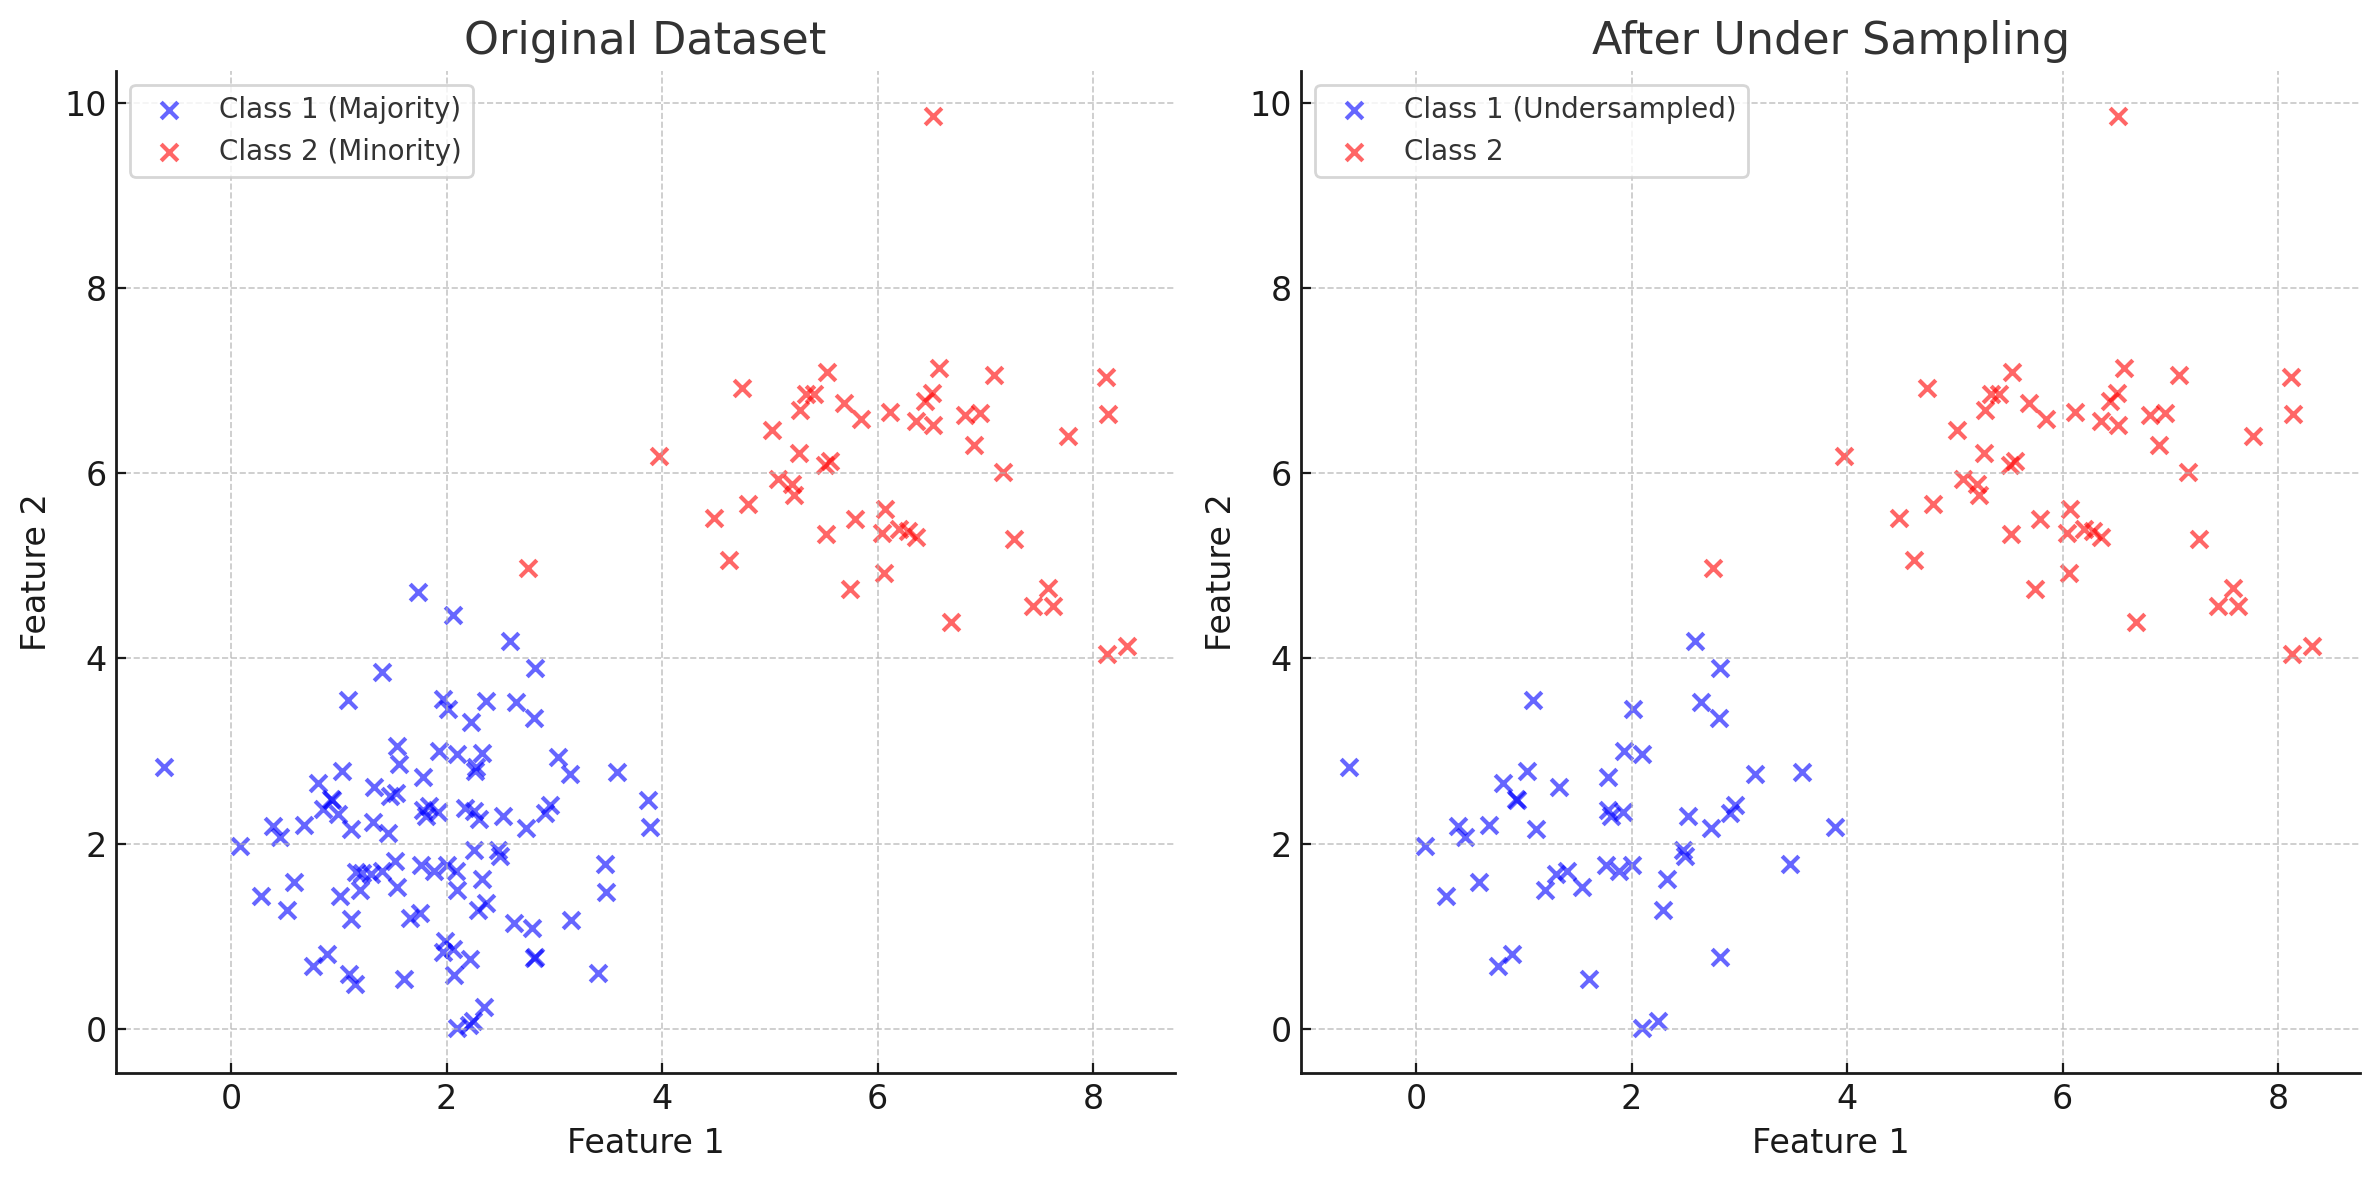

# Code Example

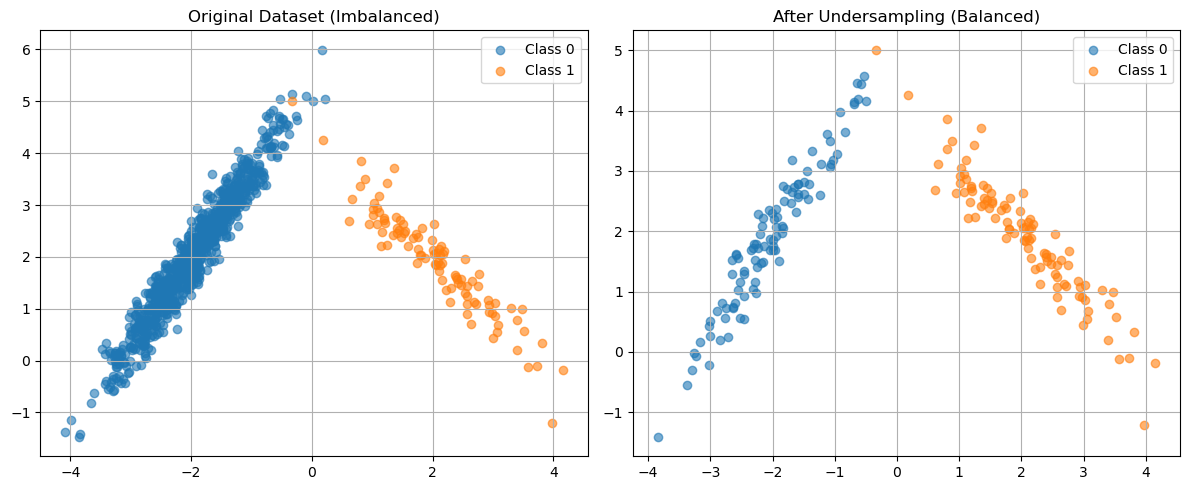

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Generate synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, 
                           weights=[0.9, 0.1], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1, 
                           n_samples=1000, random_state=42)

# Plot original dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Dataset (Imbalanced)")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.grid(True)

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot resampled dataset
plt.subplot(1, 2, 2)
plt.title("After Undersampling (Balanced)")
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.6)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:
import sklearn
import imblearn

print("sklearn version:", sklearn.__version__)
print("imblearn version:", imblearn.__version__)


sklearn version: 1.5.0
imblearn version: 0.13.0


In [4]:
pip install -U imbalanced-learn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


# 2. Over Sampling

**Over Sampling** is a technique where we increase the number of samples in the minority class by **randomly duplicating existing records**.  
This process continues until the number of samples in the minority class equals that of the majority class.

---

### Visual Illustration:

| **Original Dataset**     |             | **After Over Sampling**   |             |
|--------------------------|-------------|----------------------------|-------------|
| Class 1: 100 samples     |             | Class 1: 100 samples       |             |
| Class 2: 50 samples      |             | Class 2: 100 samples       |             |

We perform **duplication of minority class** samples until the dataset becomes balanced.

---

## Advantages of Over Sampling

1. **Reduction in Bias**  
   The model now gives **equal attention** to both minority and majority classes.

---

## Disadvantages of Over Sampling

1. **Increased Dataset Size**  
   Since we are duplicating the minority class to match the majority, the overall **dataset size increases**.

2. **Risk of Overfitting**  
   Repeating the same minority class samples may cause the model to **memorize** them.  
   The algorithm might **overestimate the importance** of these repeated data points, increasing the risk of **overfitting**.


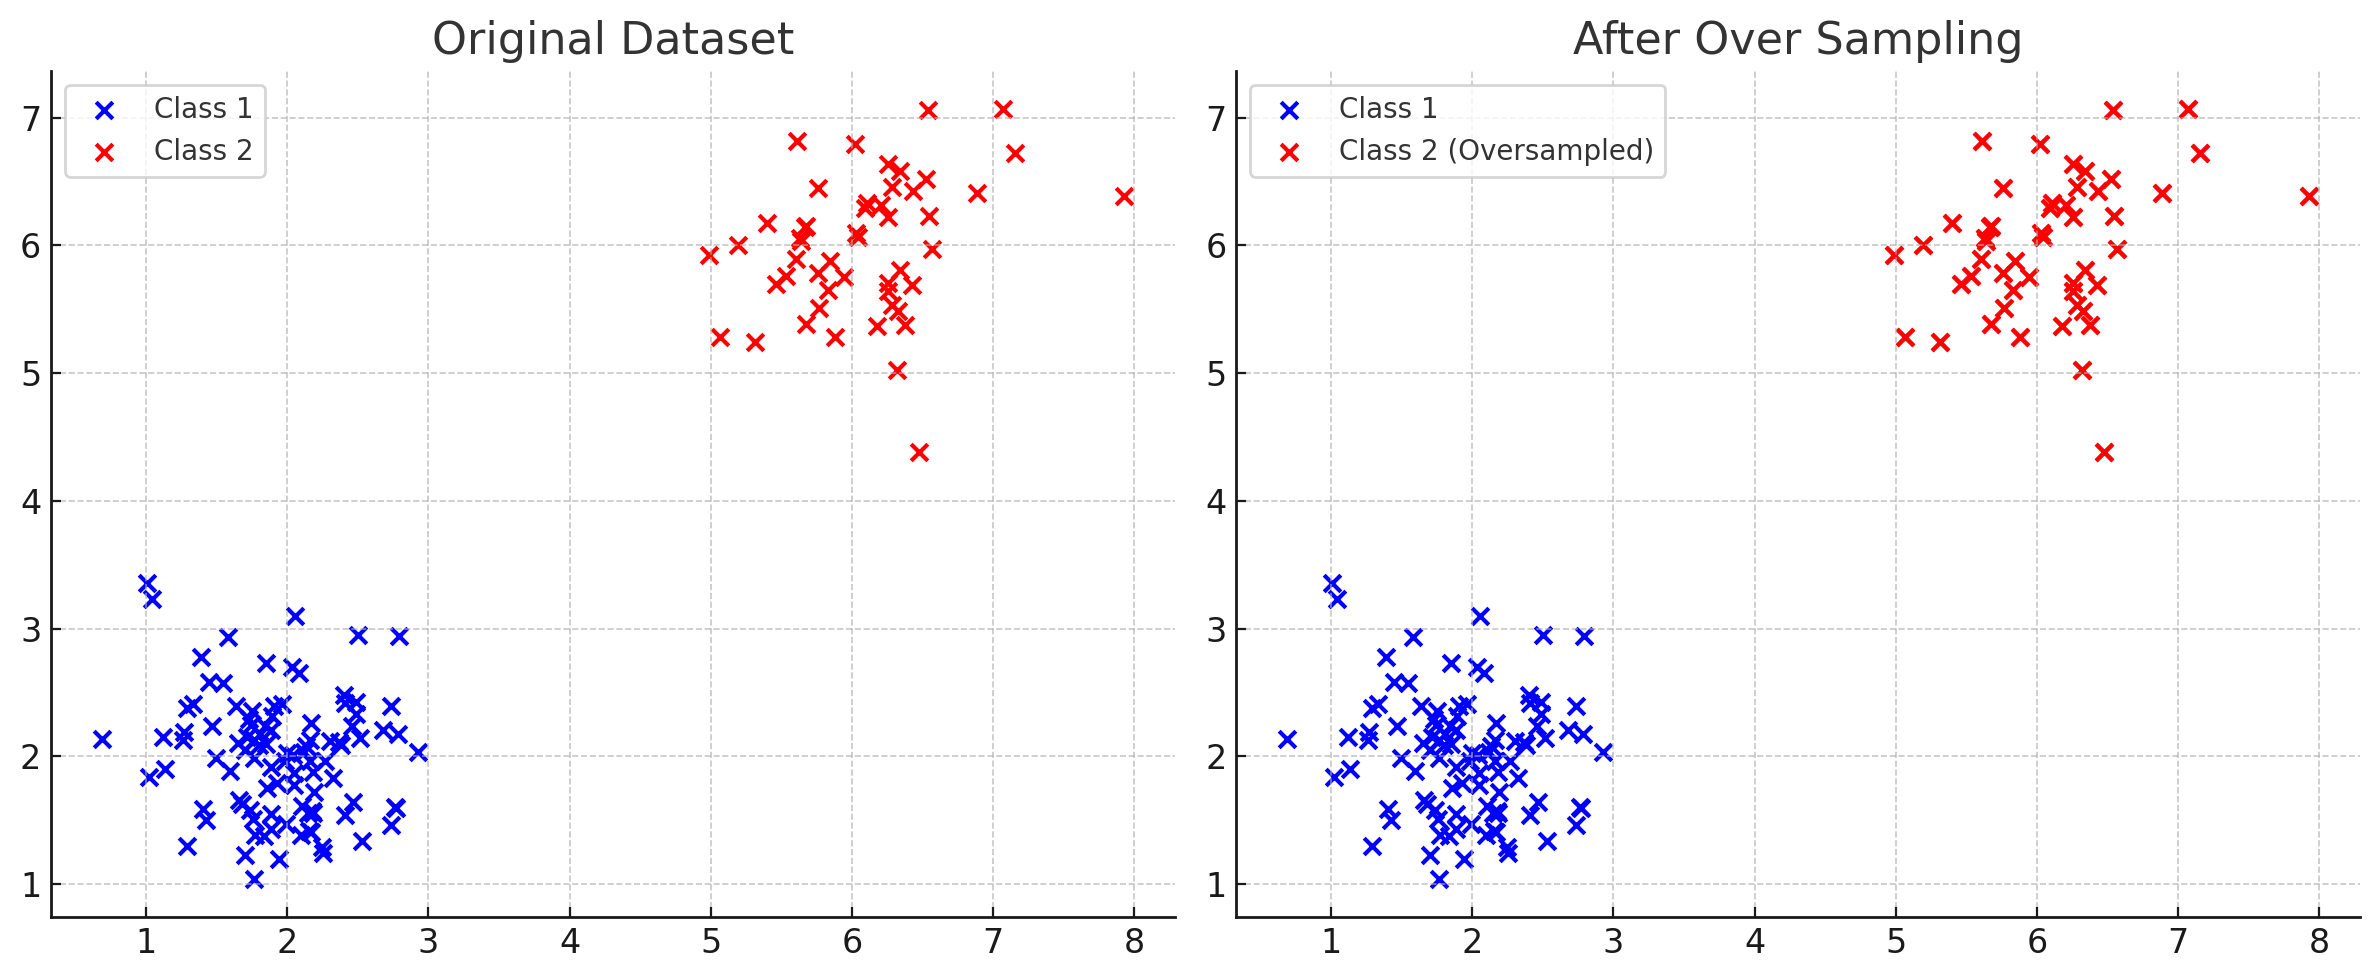

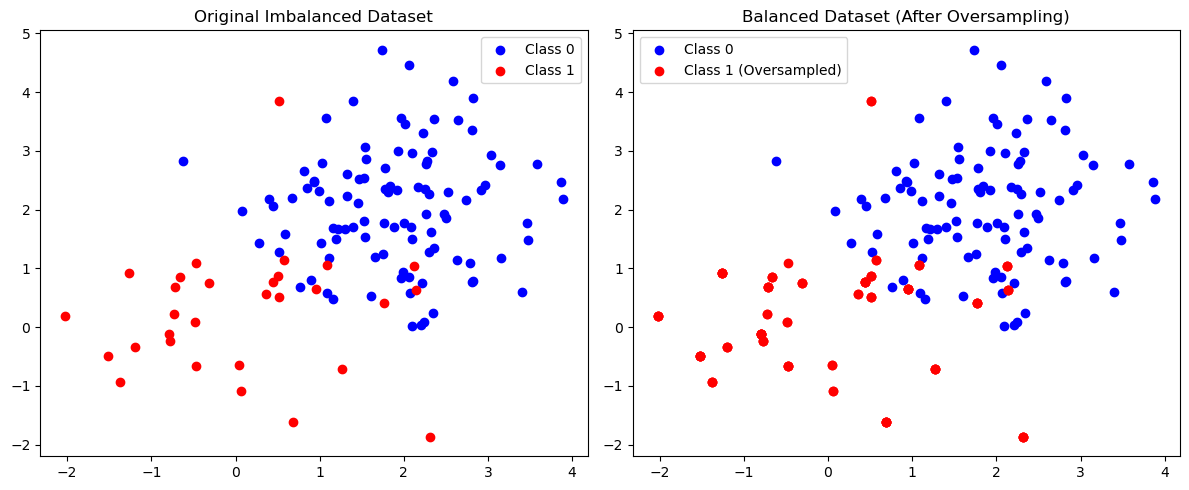

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Create sample data
np.random.seed(42)
class_1 = np.random.randn(100, 2) + [2, 2]  # Majority class (label 0)
class_2 = np.random.randn(30, 2) + [0, 0]   # Minority class (label 1)

X = np.vstack((class_1, class_2))
y = np.array([0]*100 + [1]*30)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Plot before and after oversampling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before Oversampling
ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', color='blue')
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', color='red')
ax1.set_title("Original Imbalanced Dataset")
ax1.legend()

# After Oversampling
ax2.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', color='blue')
ax2.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1 (Oversampled)', color='red')
ax2.set_title("Balanced Dataset (After Oversampling)")
ax2.legend()

plt.tight_layout()
plt.show()


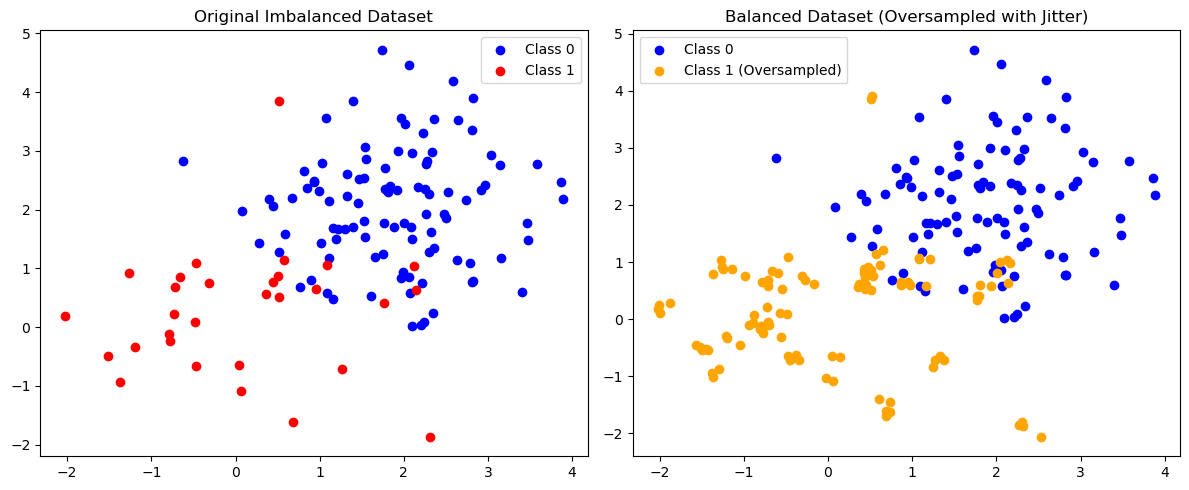

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Create sample data
np.random.seed(42)
class_0 = np.random.randn(100, 2) + [2, 2]  # Majority class (label 0)
class_1 = np.random.randn(30, 2) + [0, 0]   # Minority class (label 1)

X = np.vstack((class_0, class_1))
y = np.array([0]*100 + [1]*30)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Add slight jitter (only to the new duplicated samples of class 1 for visualization)
from collections import Counter

# Count before resampling
original_counts = Counter(y)
resampled_counts = Counter(y_resampled)

# Identify the number of new samples added for class 1
added_count = resampled_counts[1] - original_counts[1]

# Indices of new samples (after the original dataset)
new_samples_start_index = len(X)
new_samples_end_index = new_samples_start_index + added_count

# Add jitter
X_resampled[new_samples_start_index:new_samples_end_index] += np.random.normal(0, 0.1, (added_count, 2))

# Plot before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before Oversampling
ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', color='blue')
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', color='red')
ax1.set_title("Original Imbalanced Dataset")
ax1.legend()

# After Oversampling with jitter
ax2.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', color='blue')
ax2.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1 (Oversampled)', color='orange')
ax2.set_title("Balanced Dataset (Oversampled with Jitter)")
ax2.legend()

plt.tight_layout()
plt.show()


### **Note: Why Oversampling May Look the Same Visually**

When we apply **Random Oversampling**, we duplicate the minority class samples to match the size of the majority class.  
However, since the duplicated data points are **identical**, they **overlap** with the original points in a 2D scatter plot.  
This makes it **difficult to visually detect** any difference in the number of samples after oversampling.

#### To overcome this:
We can **add slight random noise (jitter)** to the duplicated samples.  
This helps us **visually distinguish** between original and oversampled points, making the effect of oversampling more obvious in a plot.

#### Important:
This jitter is **only for visualization** purposes.  
In actual training, oversampled points are **exact duplicates** unless you use advanced techniques like **SMOTE**.


---
---
---

# Synthetic Minority Oversampling Technique (SMOTE)

**SMOTE** is an advanced **oversampling technique** used to handle imbalanced datasets in machine learning. Instead of simply duplicating minority class samples like traditional oversampling, **SMOTE creates synthetic (new) data points** to reduce overfitting and achieve better generalization.

---

### Why Not Duplication?

Duplicating data can lead to **overfitting**, because the model sees the same pattern repeatedly and starts assuming it as highly important.  
**SMOTE** solves this problem by **generating new synthetic points**, not just copies.

---

## How Does SMOTE Work?

SMOTE uses a technique called **interpolation** to create new samples between existing minority class samples.

---

### Steps Involved:

#### **Step 1: Train KNN on Minority Class**
- Choose all the samples from the **minority class**.
- Train a **K-Nearest Neighbors (KNN)** model on these data points (typically with `k=5`).

#### **Step 2: Generate New Data**
- Randomly select a minority class sample `X`.
- Find its `k` nearest neighbors in the same class.
- Randomly choose one neighbor `Xn`.
- Interpolate a new point **between `X` and `Xn`** using the formula:

$$
\text{New Sample} = X + \text{factor} \times (Xn - X)
$$

Where:
- `factor` is a random number between `0` and `1`.

##### **Example:**
If  
`Sample X = (1,1)`  
`Neighbor Xn = (2,2)`  
and `factor = 0.5`, then:

$$
\text{New Sample} = (1,1) + 0.5 \times ((2,2) - (1,1)) = (1.5, 1.5)
$$

#### **Step 3: Repeat Until Balanced**
Repeat this process until the **minority class** has the same number of samples as the **majority class**.

---

## Advantages of SMOTE

1. **Bias Reduction**  
   Helps models learn from the minority class better by increasing its representation.

2. **Avoids Overfitting**  
   Since data is synthetically generated and not duplicated, the chance of overfitting is reduced.

---

## Disadvantages of SMOTE

1. **Does Not Work Well with Categorical Data**  
   SMOTE is designed for **numerical features**.

2. **Computationally Expensive**  
   Using KNN increases complexity — large datasets take time.

3. **Sensitive to Outliers**  
   New data points can be generated from noisy or outlier points.

4. **Dependent on `k` value**  
   - Too small `k` (e.g., 1): Generated points are close and might again lead to overfitting.
   - Too large `k` (e.g., 25): New points might be scattered and irrelevant.
   - So, choose a **moderate value of `k`** (typically 5).

5. **Synthetic Data Might Not Represent Reality**  
   There is **no guarantee** that the synthetic points truly reflect the actual distribution of the real-world data.

---


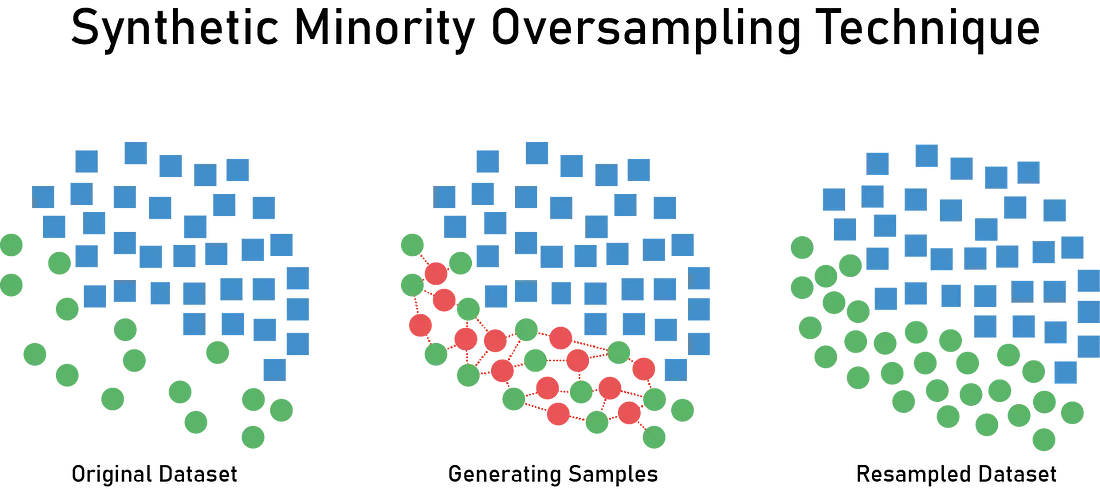

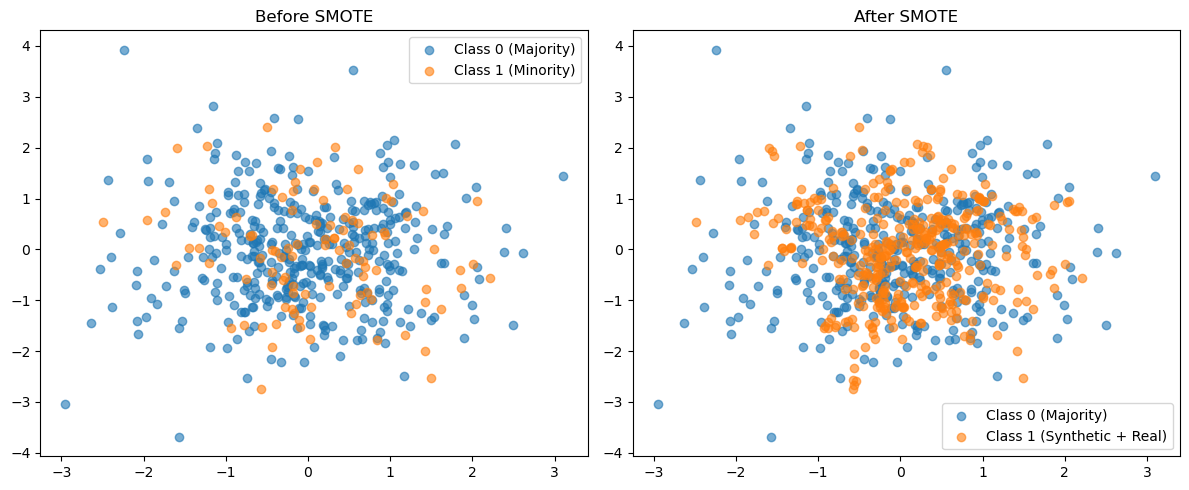

In [1]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.8, 0.2], n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=500, random_state=42)

# Visualize original dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0 (Majority)', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)', alpha=0.6)
plt.title("Before SMOTE")
plt.legend()

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Visualize SMOTE dataset
plt.subplot(1, 2, 2)
plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Class 0 (Majority)', alpha=0.6)
plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Class 1 (Synthetic + Real)', alpha=0.6)
plt.title("After SMOTE")
plt.legend()

plt.tight_layout()
plt.show()


# Handling Imbalanced Data: Ensemble Methods

## Concept:

Suppose you have **1200 data points**:
- **Class 1 (Majority): 900**
- **Class 2 (Minority): 300**

To overcome class imbalance, instead of manipulating the original dataset, you can **train multiple models**, each on a **balanced subset** created from the original data.

---

## How It Works:

1. **Divide the majority class into equal subsets**, each matching the size of the minority class.
2. **Each model** is trained on one such subset + all of the minority class.
3. At prediction time, **each model gives its prediction**, and the final result is taken via **majority voting**.

---

## Visual Representation

Each model sees a different subset of the majority class, but the **entire minority class**, ensuring balance.

| Model | Class 1 Samples | Class 2 Samples |
|-------|------------------|------------------|
| Model 1 | 300              | 300              |
| Model 2 | 300              | 300              |
| Model 3 | 300              | 300              |

---

### Visualization

Below is the plot showing how the **balanced subsets** are created for each model:

*(Refer plot below)*

---

## Advantages:

1. **Bias Reduction**  
   Since every model trains on a balanced dataset, bias toward majority class is reduced.

2. **Better Generalization**  
   Ensemble of models usually generalizes better than a single model.

3. **Utilization of Full Data**  
   All minority samples are reused, and majority samples are spread across models.

---

## Disadvantages:

1. **Increased Training Time**  
   Multiple models need to be trained instead of one.

2. **Higher Complexity**  
   Combining predictions from multiple models adds computation overhead.

3. **Risk of Missing Patterns**  
   Each model sees only a subset of the majority class — it may miss some patterns present in the full majority class.

---

## When to Use:

- Large datasets with **high imbalance**.
- When **computational power is available** to handle multiple models.
- When **overfitting due to oversampling** or **underfitting due to undersampling** is a concern.



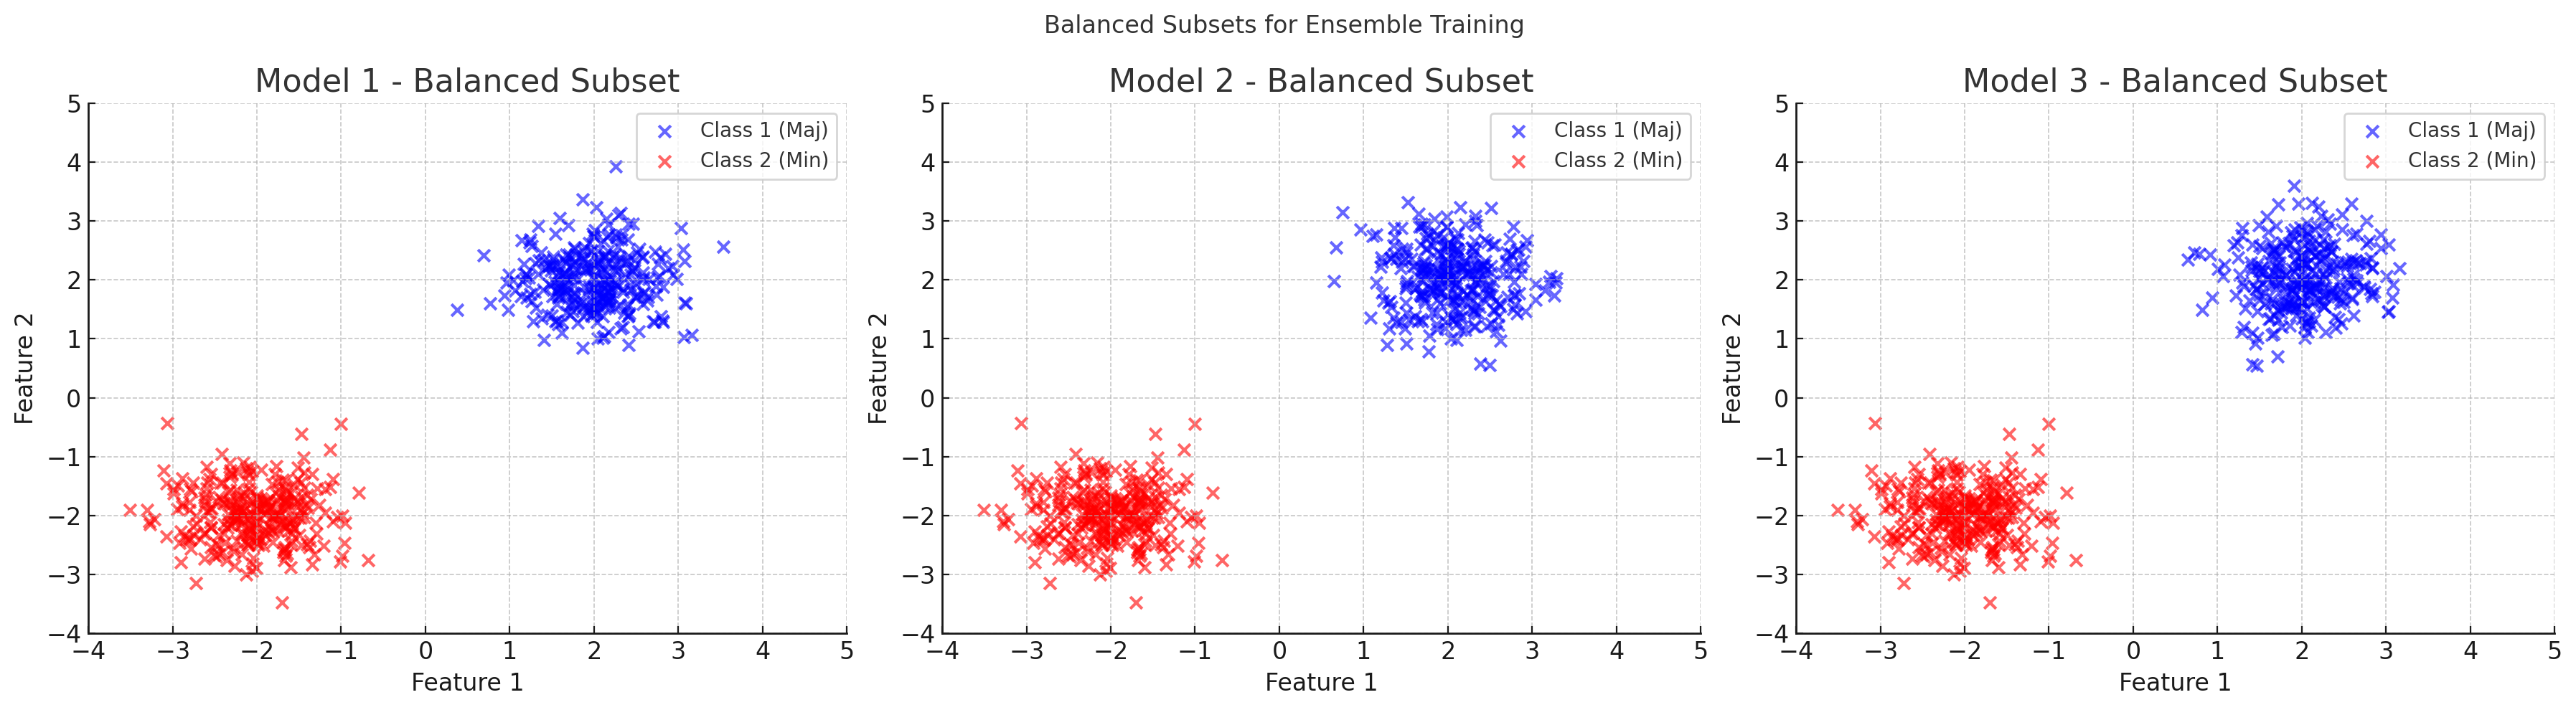

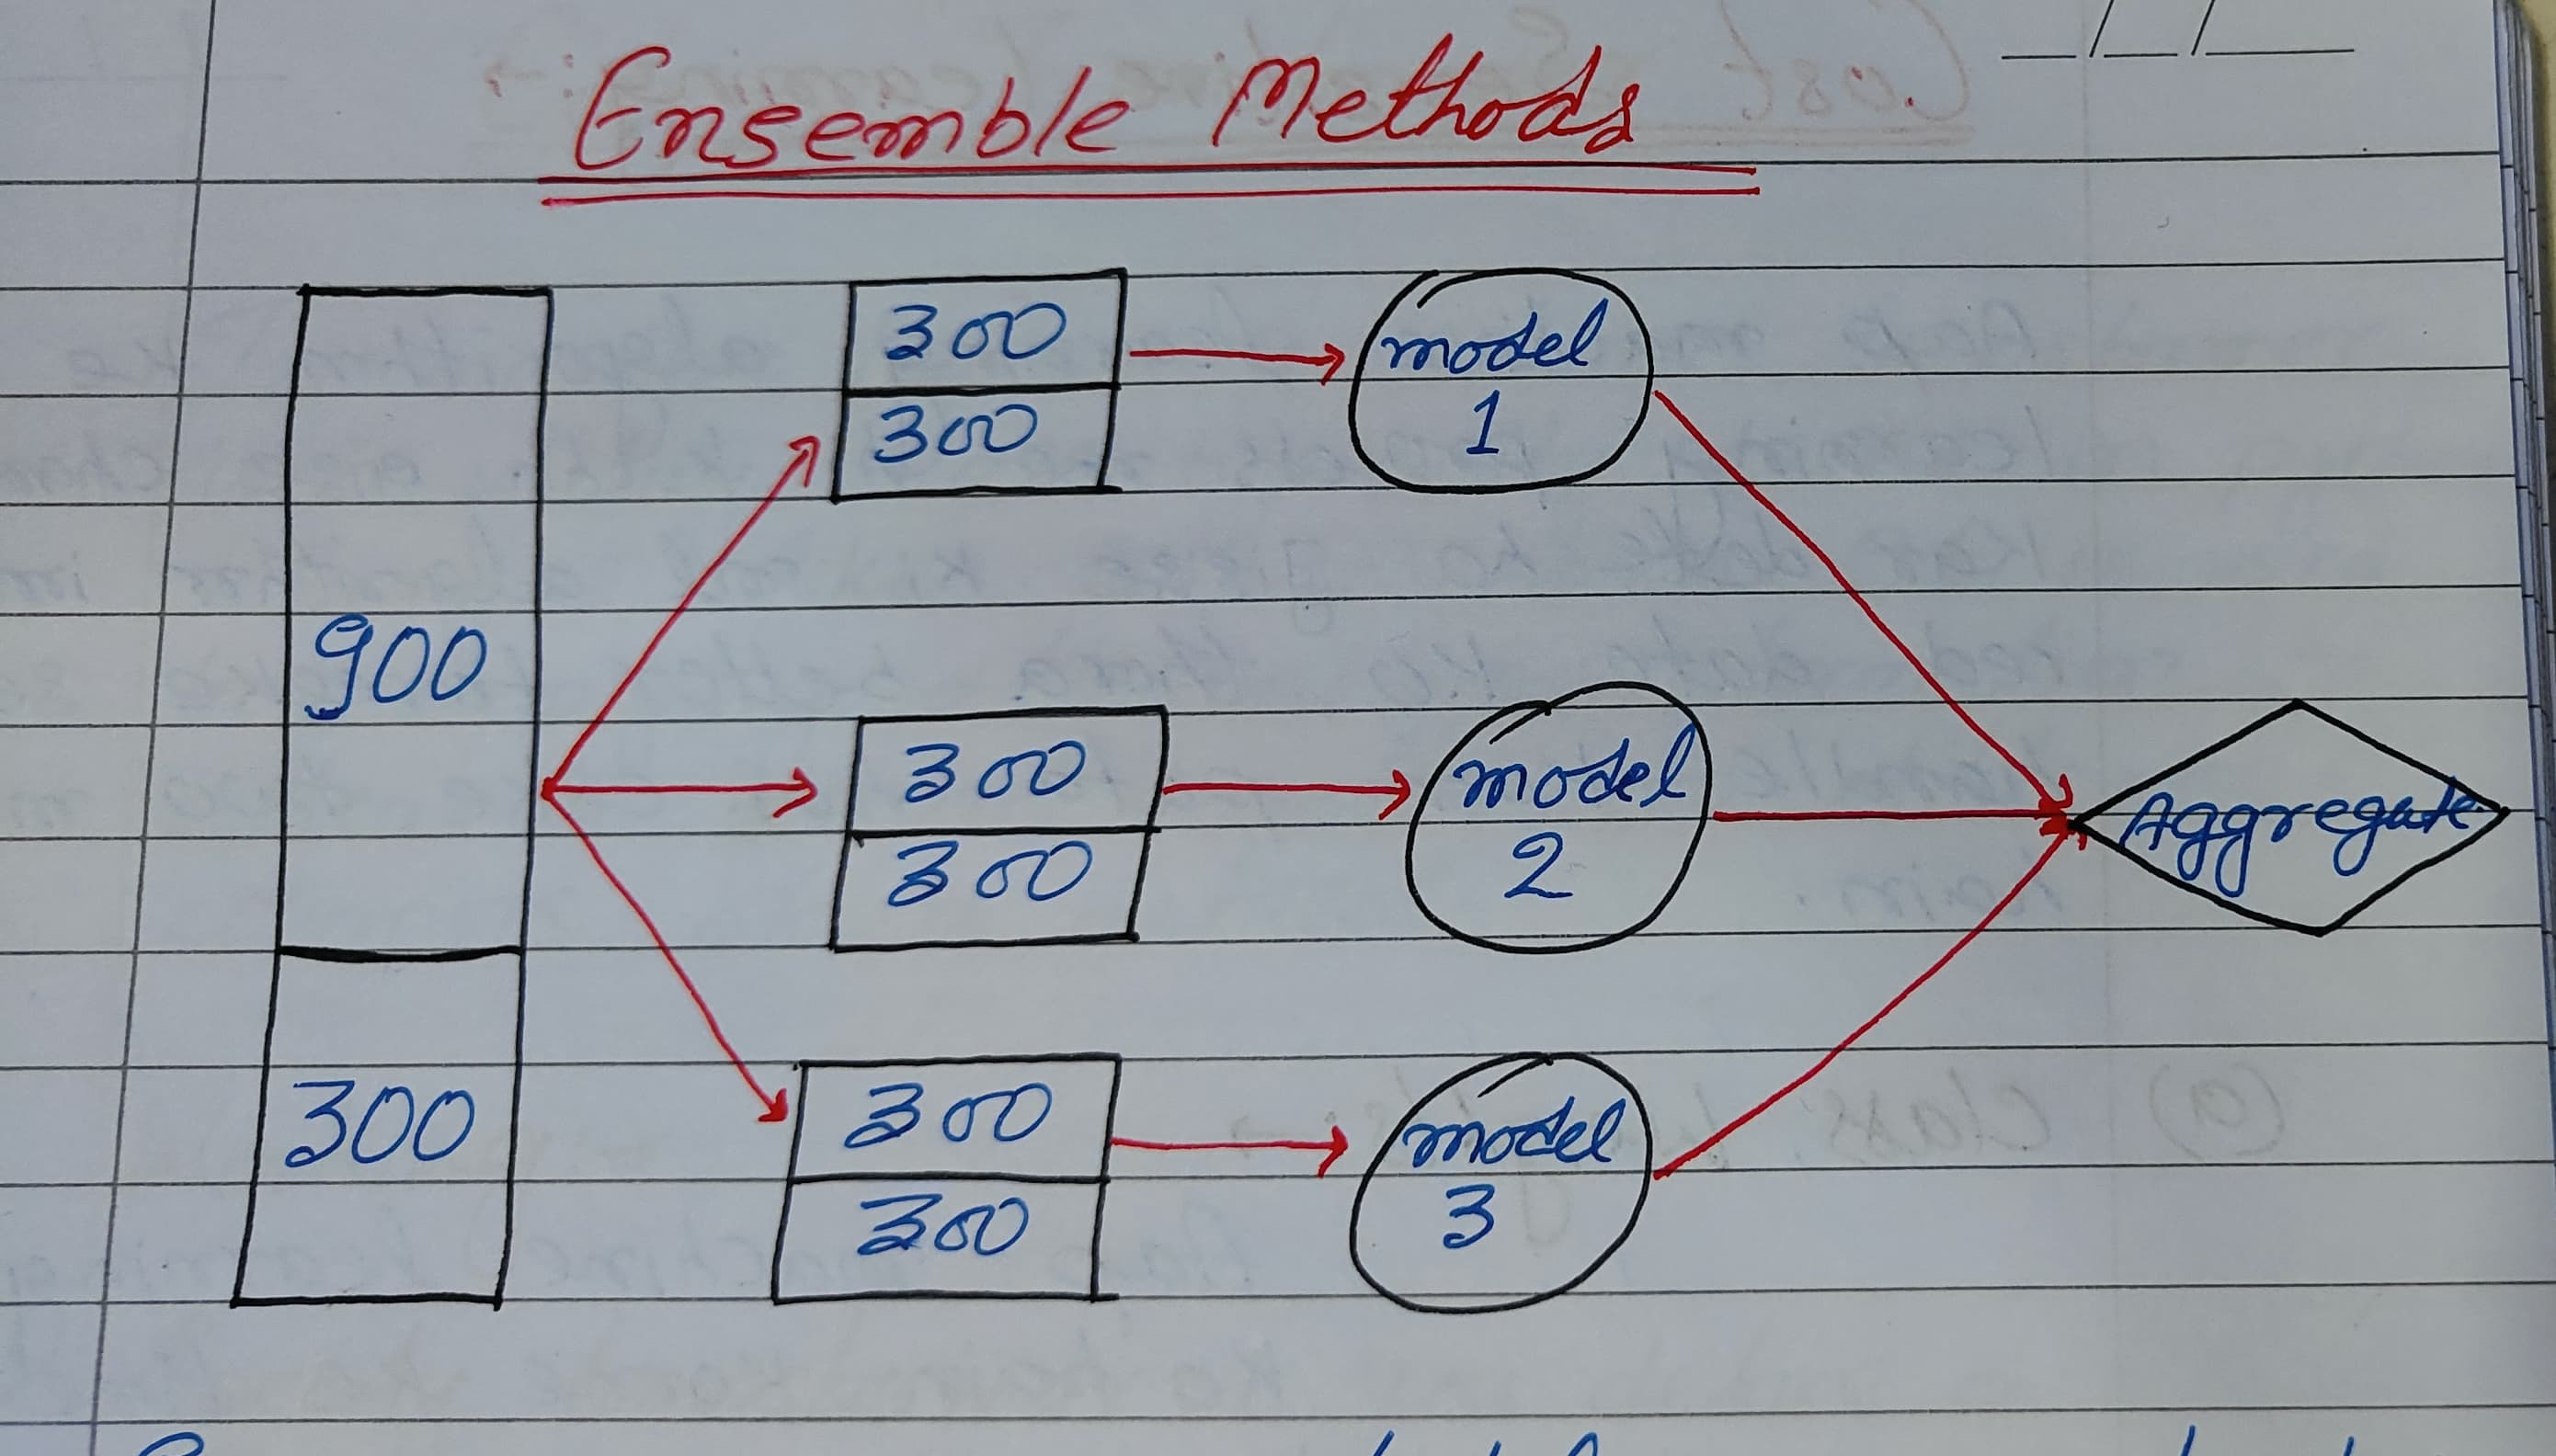

# Handling Imbalanced Data: Ensemble Method (Using Bagging)

In this approach, we build multiple models using **different balanced subsets** of the dataset and combine their predictions using **majority voting**.

---

## Step 1: Import Required Libraries



In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from collections import Counter

## Step 2: Generate Imbalanced Dataset

Original class distribution: Counter({0: 895, 1: 305})


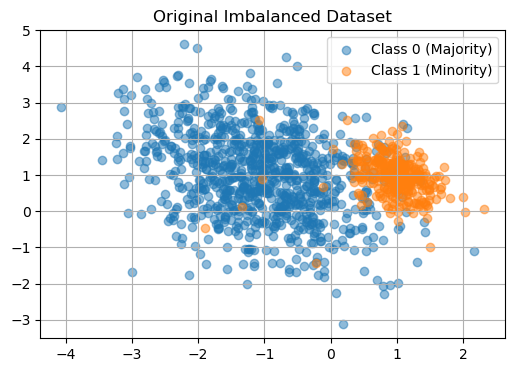

In [4]:
X, y = make_classification(n_samples=1200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, weights=[0.75, 0.25], 
                           random_state=42)

print(f"Original class distribution: {Counter(y)}")

# Visualize dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0 (Majority)', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)', alpha=0.5)
plt.title("Original Imbalanced Dataset")
plt.legend()
plt.grid(True)
plt.show()


## Step 3: Split Train-Test Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=42)


## Step 4: Create Balanced Subsets and Train Bagging Classifier

In [7]:
# Create balanced datasets using manual undersampling of majority class
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# Prepare bagging base estimator
base_model = DecisionTreeClassifier(random_state=42)

# Bagging with auto-sampling from balanced subsets
bagging = BaggingClassifier(estimator=base_model, 
                            n_estimators=10,
                            max_samples=len(y_train_1)*2,
                            bootstrap=True,
                            random_state=42)

# Combine majority and minority classes to create synthetic balanced dataset per estimator
X_bag = np.vstack([X_train_1, X_train_0[:len(y_train_1)]])
y_bag = np.hstack([y_train_1, y_train_0[:len(y_train_1)]])

# Fit bagging on entire data using subset
bagging.fit(X_bag, y_bag)


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=154, random_state=42)

## Step 5: Evaluate Ensemble Model

Classification Report (Ensemble):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.83      0.96      0.89        25

    accuracy                           0.95       125
   macro avg       0.91      0.95      0.93       125
weighted avg       0.96      0.95      0.95       125



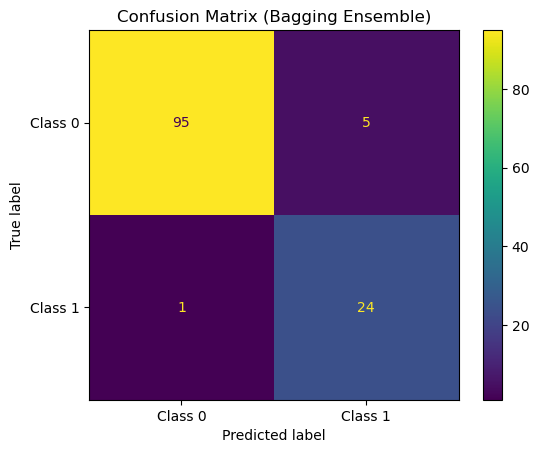

In [8]:
y_pred = bagging.predict(X_test)

print("Classification Report (Ensemble):")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Class 0", "Class 1"])
plt.grid(False)
plt.title("Confusion Matrix (Bagging Ensemble)")
plt.show()


##  Observation

- Each **base model** in the ensemble is trained on a **balanced subset** of the data.
- The **final prediction** is made using **majority voting** across all base learners.
- This approach helps in **reducing bias** without the need to **duplicate (oversampling)** or **discard (undersampling)** too much data.


---
---
---

# Handling Imbalanced Data: Cost-Sensitive Learning

## Concept

Cost-Sensitive Learning is an approach where we **modify the learning process itself**, rather than changing the dataset.  
The idea is to **assign higher cost or penalty to errors made on the minority class** so that the model pays more attention to it during training.

---

## Two Common Methods

### (a) Class Weights

In this technique, we **assign weights to each class** based on their frequencies in the dataset.  
This ensures the model gives **more importance to the minority class** during training.

#### Example:

| Class | Count | Weight Assigned |
|-------|--------|-----------------|
| 0     | 900    | 1               |
| 1     | 100    | 9               |

This tells the ML algorithm:
> “If you make an error on Class 1 (minority), take it more seriously, and penalize it more during optimization.”

Most ML libraries like `sklearn`, `XGBoost`, and `LightGBM` allow specifying `class_weight='balanced'`  
or manually providing a dictionary of weights like `{0:1, 1:9}`.

---

### (b) Custom Loss Function

Sometimes, we go beyond predefined options and **create our own loss function** that penalizes mistakes on the minority class more severely.  
This approach gives **fine-grained control over learning behavior**, especially in neural networks or advanced ML pipelines.

---

## Advantages

- **Directly targets the imbalance problem** in learning.
- No need to modify or resample the original dataset.
- Works well with many algorithms that support weighted training.

---

## Disadvantages

- **Tuning weights is tricky** — assigning too high a weight may cause overfitting.
- **Not supported in all algorithms**.
- Custom loss requires more coding and experimentation.

---

## When to Use

- When resampling techniques (under/over/SMOTE) are not feasible.
- When the algorithm supports class weights (like `LogisticRegression`, `RandomForest`, `XGBoost`, etc.)
- In neural networks, when we can define custom loss logic.



In [9]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)

# Check class distribution
print("Original class distribution:", Counter(y))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Create model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report with Class Weights:\n")
print(classification_report(y_test, y_pred))


Original class distribution: Counter({0: 897, 1: 103})

Classification Report with Class Weights:

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       224
           1       0.45      0.85      0.59        26

    accuracy                           0.88       250
   macro avg       0.71      0.86      0.76       250
weighted avg       0.92      0.88      0.89       250

